# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

We decided to analyze the TMDb Movies Dataset. After taking a first look at the dataset, we ask ourselves the following questions.


### Questions:


**Q1. Which movie earns the most and least profit ? What are the average profit and profit distribution ?** 

**Q2. Which movie had the greatest and least revenue ? What are the average revenue and revenue distribution ?**

**Q3. Which movie had the greatest and least runtime ? What are the average runtime and runtime distribution ?** 

**Q4. Which movie had the greatest and least budget ? What are the average budget and budget distribution ?**

**Q5. Which year generated the most profits for the film industry ?**

**Q6. What are the most and least profitable directors ?**

<a id='intro'></a>
## Introduction


In [1]:
import datetime
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

We're going to observe the general properties of the dataset using df.head(), df.tail(), df.info(), df.shape(), df.describe() in order to learn about structure, index, columns, statistics, data types and shape of the IMDb Movies Dataset. 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3) # Discover the dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.info() # Observe columns info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.shape

(10866, 21)

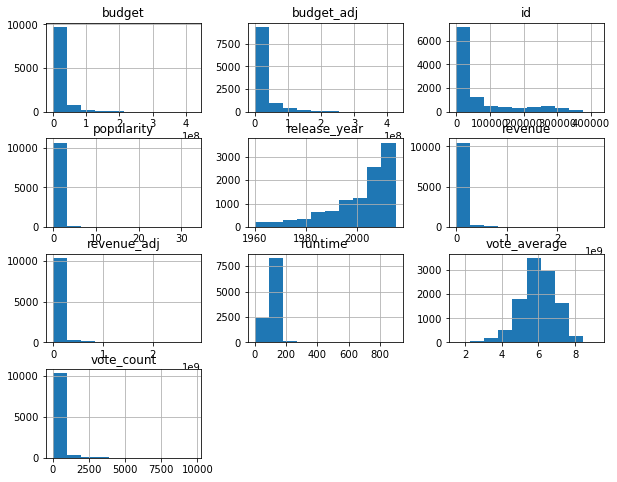

In [6]:
df.hist(figsize = (10, 8)) ; # Observe the distribution of the dataset

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.duplicated().sum() # Looking for duplicates in the dataset

1

In [9]:
df.isnull().sum() # Looking for null values in the dataset

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

We plan to delete unused columns, to change release date column from string to date format, to remove duplicated values, to replace 0 with NAN in runtime column, and to change format and remove 0 of budget and revenue columns.

In [10]:
# Delete unused columns
df = df.drop(['imdb_id', 'overview', 'homepage', 'tagline', 'id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis = 1)
df.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015


In [11]:
# Delete duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [12]:
# Delete null values
df.dropna(inplace = True)
df.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [13]:
# Change release date column into standard date format
df.release_date = pd.to_datetime(df['release_date'])
df.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [14]:
# Replace 0 with NAN value in runtime column
df['runtime'] = df['runtime'].replace(0, np.NaN)

In [15]:
# Remove 0 from budget and revenue columns
tlist = ['budget', 'revenue']
df[tlist] = df[tlist].replace(0, np.NaN)
df.dropna(subset = tlist, inplace = True)

In [16]:
# Change format of budget and revenue columns
ctype = ['budget', 'revenue']
df[ctype] = df[ctype].applymap(np.int64)
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [17]:
# Reset the index of the dataset
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3849 non-null   int64         
 1   revenue         3849 non-null   int64         
 2   original_title  3849 non-null   object        
 3   cast            3849 non-null   object        
 4   director        3849 non-null   object        
 5   runtime         3849 non-null   float64       
 6   genres          3849 non-null   object        
 7   release_date    3849 non-null   datetime64[ns]
 8   release_year    3849 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 270.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis

In order to analyze the dataset, we need to compute the profits of each movie.

In [18]:
df.insert(2, 'profit_earned', df['revenue'] - df['budget']) # Creates a new column for the profits earned 
df.head(3)

,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015


### Q1. Which movie earns the most and least profit ? What are the average profit and profit distribution ?

In [19]:
import pprint
def compute(column):
    high = df[column].idxmax()
    high_details = pd.DataFrame(df.loc[high])
    low = df[column].idxmin()
    low_details = pd.DataFrame(df.loc[low])
    info = pd.concat([high_details, low_details], axis=1)
    return info

compute('profit_earned')

,344,682
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


The maximum profit of the dataset is 2,544,505,847$, generated by the movie Avatar

The minimum profit of the dataset is -413,912,431$, generated by the movie The Warrior's Way

In [20]:
print('The average profit is :', df['profit_earned'].mean())

The average profit is : 70565951.6305534


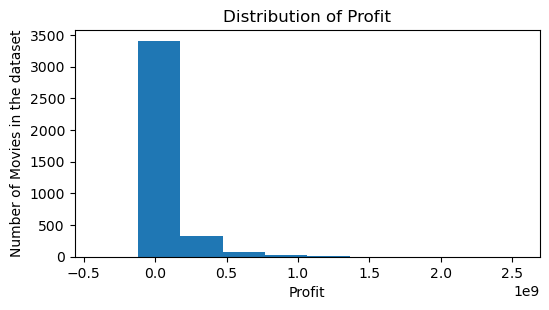

In [21]:
plt.figure(figsize=(6,3), dpi = 100)
plt.xlabel('Profit')
plt.ylabel('Number of Movies in the dataset')
plt.title('Distribution of Profit')
plt.hist(df['profit_earned'])
plt.show()

In [22]:
df['profit_earned'].describe()

count    3.849000e+03
mean     7.056595e+07
std      1.506990e+08
min     -4.139124e+08
25%     -1.312284e+06
50%      2.014450e+07
75%      8.198066e+07
max      2.544506e+09
Name: profit_earned, dtype: float64

### Q2. Which movie had the greatest and least revenue ? What are the average revenue and revenue distribution ?

In [23]:
compute('revenue')

,344,1729
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


The maximum revenue of the dataset is 2,781,505,847$, generated by the movie Avatar

The minimum revenue of the dataset is 2$, generated by the movie Shattered Glass

In [24]:
print('The average revenu is :', df['revenue'].mean())

The average revenu is : 107814811.610808


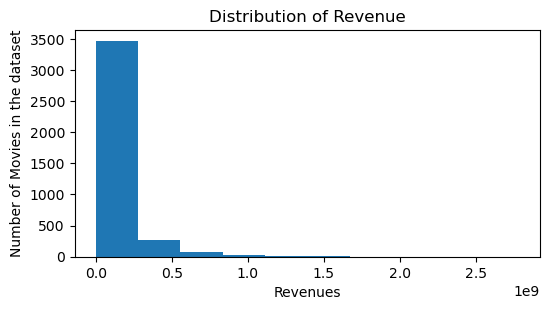

In [25]:
plt.figure(figsize=(6,3), dpi = 100)
plt.xlabel('Revenues')
plt.ylabel('Number of Movies in the dataset')
plt.title('Distribution of Revenue')
plt.hist(df['revenue'])
plt.show()

In [26]:
df['revenue'].describe()

count    3.849000e+03
mean     1.078148e+08
std      1.766175e+08
min      2.000000e+00
25%      1.367069e+07
50%      4.490726e+07
75%      1.243052e+08
max      2.781506e+09
Name: revenue, dtype: float64

### Q3. Which movie had the greatest and least runtime ? What are the average runtime and runtime distribution ? 

In [27]:
compute('runtime')

,653,1755
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


The maximum runtime of the dataset is 338 minutes, the concerned movie is Carlos

The minimum runtime of the dataset is 15 minutes, the concerned movie is Kid's Story

In [28]:
print('The average runtime is :', df['runtime'].mean())

The average runtime is : 109.21745908028059


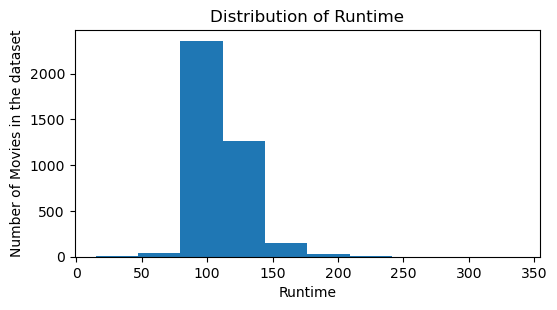

In [29]:
plt.figure(figsize=(6,3), dpi = 100)
plt.xlabel('Runtime')
plt.ylabel('Number of Movies in the dataset')
plt.title('Distribution of Runtime')
plt.hist(df['runtime'])
plt.show()

The distribution is positively skewed, most of the movies range between 80 to 120 min. 

In [30]:
df['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Q4. Which movie had the greatest and least budget ? What are the average budget and budget distribution ?

In [31]:
compute('budget')

,682,810
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


The maximum budget of the dataset is 425,000,000$, generated by the movie The Warrior's Way

The minimum budget of the dataset is 1$, generated by the movie Lost & Found

In [32]:
print('The average budget is :', df['budget'].mean())

The average budget is : 37248859.98025461


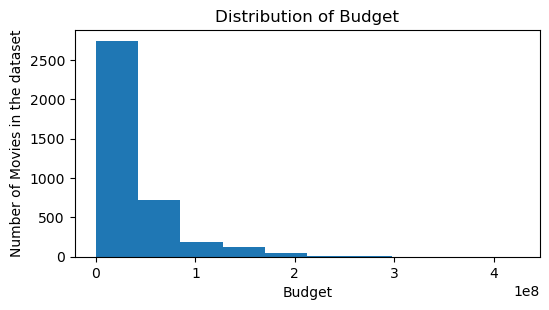

In [33]:
plt.figure(figsize = (6,3), dpi = 100)
plt.xlabel('Budget')
plt.ylabel('Number of Movies in the dataset')
plt.title('Distribution of Budget')
plt.hist(df['budget'])
plt.show()

In [34]:
df['budget'].describe()

count    3.849000e+03
mean     3.724886e+07
std      4.221699e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

### Q5. Which year generated the most profits for the film industry ?

In [35]:
profits_per_year = df.groupby('release_year')['profit_earned'].sum() # Groups profits earned per year

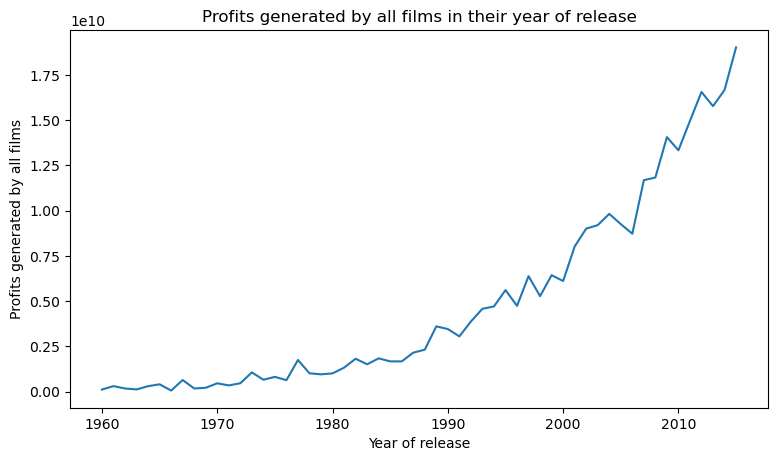

In [36]:
plt.figure(figsize = (9, 5), dpi = 100)
plt.xlabel('Year of release')
plt.ylabel('Profits generated by all films')
plt.title('Profits generated by all films in their year of release')
plt.plot(profits_per_year)
plt.show()

Movies are increasingly profitable over the years. This observation can be explained in particular by the ever-increasing budgets devoted to films as well as by a general increase in the financial power of the film industry.

In [37]:
profits_per_year.head(10) # Profits earned each year during the 10 first years

release_year
1960    108198052
1961    299083188
1962    166879846
1963    115411882
1964    294678387
1965    399281854
1966     52468689
1967    636334637
1968    168271762
1969    206862989
Name: profit_earned, dtype: int64

In [38]:
profits_per_year.tail(10) # Profits earned each year durant the 10 last years

release_year
2006     8726299999
2007    11686103667
2008    11836553159
2009    14069305071
2010    13341222037
2011    14966694704
2012    16565945507
2013    15782743325
2014    16676201357
2015    19032145273
Name: profit_earned, dtype: int64

In [39]:
print('The most profitable year was :', profits_per_year.idxmax())
print('The least profitable year was :', profits_per_year.idxmin())

The most profitable year was : 2015
The least profitable year was : 1966


### Q6. What are the most and worst profitable directors ?

In [40]:
top_director = df[['director', 'profit_earned']].groupby('director')['profit_earned'].sum()
top_director = top_director.reset_index().sort_values(['profit_earned'], ascending = False).set_index(['director'])

In [41]:
top_director.head(10) # Most profitable directors in the dataset

,profit_earned
director,
Steven Spielberg,7467063772
Peter Jackson,5197244659
James Cameron,5081994863
Michael Bay,3557208171
David Yates,3379295625
Christopher Nolan,3162548502
Chris Columbus,3116631503
George Lucas,2955996893
Robert Zemeckis,2846690869


All of these directors could be choose to make a profitable movies or a so-called blockbuster.

In [42]:
top_director.tail(10) # Least profitable directors in the dataset

,profit_earned
director,
Lawrence Kasanoff,-64926294
Oliver Hirschbiegel|James McTeigue,-64928486
Simon Wells,-67278066
Rod Lurie,-70346150
Joby Harold,-71626175
Andrei Konchalovsky,-74885029
Walter Hill|Jack Sholder,-75171919
David Bowers|Sam Fell,-84540684
Aaron Blaise|Robert Walker,-99999750


The most profitable director is Steven Spielberg, who generated a gain of 7,467,063,772$ in his career

The least profitable director is Lawrence Kasanoff, who generated a loss of -64,926,294$ in his career

<a id='conclusions'></a>
## Conclusions

Analysis of the TMDb dataset allows us to answer the questions asked beforehand : 

- **Q1**. The maximum profit of the dataset is 2,544,505,847$, generated by the movie Avatar

    The minimum profit of the dataset is -413,912,431$, generated by the movie The Warrior's Way

    The average profit is : 70565951.6305534
    

- **Q2**. The maximum revenue of the dataset is 2,781,505,847$, generated by the movie Avatar

    The minimum revenue of the dataset is 2$, generated by the movie Shattered Glass

    The average revenu is : 107814811.610808
    

- **Q3**. The maximum runtime of the dataset is 338 minutes, the concerned movie is Carlos

    The minimum runtime of the dataset is 15 minutes, the concerned movie is Kid's Story
    
    The average runtime is : 109.21745908028059
    

- **Q4**. The maximum budget of the dataset is 425,000,000$, generated by the movie The Warrior's Way. 

    The minimum budget of the dataset is 1$, generated by the movie Lost & Found. 

    The average budget is : 37248859.98025461
    

- **Q5**. The most profitable year was 2015 and the least profitable year was 1966. Movies are increasingly profitable over the years. This observation can be explained in particular by the ever-increasing budgets devoted to films as well as by a general increase in the financial power of the film industry.


- Q6. The most profitable director is Steven Spielberg and the worst profitable director is Lawrence Kasanoff


## Limitations ##


The dataset presents some kinds of limitations like : 
- Null values which can skew some analysis
- 0 value in revenue and budget which can categorized as missing data (turned into NaN to not distort the analysis)
- No currency mentionned for revenue and budget (and so on for profit earned)